## Lead Score - Case Study

### Problem Statement

- X Education is an Edtech Company which sells online courses to corporate professionals. It gets a lot of leads but the conversion rate is very poor.So,we have to make this process effective, the company wants to identify the most potential leads by making a model wherein you need to assign a lead score, such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### Scope

- Build a logistic regression model to assign a lead score between 0 and 100 to leads which can be used to target high potential leads. A higher score will indicate hot lead, i.e. is most likely to convert & vice versa
- Some Company's problems also need to be addressed by our model ie our model should be able to adjust to company's requirement if altered in future etc.

## Importing libraries and ignoring warnings

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to view all the columns
pd.set_option('display.max_columns',None)

## Methodology
- Understanding data
- Data Preparation 
- EDA 
- Creation of Dummy Variable 
- Train Test split
- Feature Scaling
- Checked Correlations
- Model Building (Feature Selection Using RFE, Improvising the model further inspecting VIF and p-vales)
- Built final model
- Model evaluation with different metrics

## Understanding data

In [2]:
ld_df=pd.read_csv('Leads.csv')
ld_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
ld_df.shape

(9240, 37)

In [4]:
ld_df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [5]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- few categorical variables present in this dataset so we will need to create dummy variables.
- Null values are also present there, so have to treat them as well.

## Data Preparation (Null Val Handling, Encoding Categorical Variables)

In [6]:
# Some categorical variables have a level called 'Select' which needs to be handled

ld_df=ld_df.replace('Select',np.nan)

In [7]:
ld_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# null value percentage
round(ld_df.isnull().sum()/len(ld_df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Checking columns with one unique value since it won't affect analysis
ld_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
#dropping columns with 1 unique val only

def drop_uni(x):
    for col in x.columns:
        if x[col].nunique()==1:
            x.drop(col,1,inplace=True)
            
drop_uni(ld_df)

In [11]:
#dropping columns with null value % greater than 37%

def drop_null(x):
    for col in x.columns:
        if round(x[col].isnull().sum()/len(x)*100,2)>37:
            x.drop(col,1,inplace=True)
            
drop_null(ld_df)

In [12]:
ld_df.shape

(9240, 24)

In [13]:
ld_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
ld_df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [16]:
ld_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
ld_df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [18]:
ld_df["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [19]:
ld_df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [20]:
ld_df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [21]:
ld_df["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [22]:
#Dropping null values rows'Last Activity','Page Views Per Visit','TotalVisits','Lead Source'
ld_df.dropna(subset=['Last Activity'], inplace=True)
ld_df.dropna(subset=['Page Views Per Visit'], inplace=True)
ld_df.dropna(subset=['TotalVisits'], inplace=True)
ld_df.dropna(subset=['Lead Source'], inplace=True)

In [23]:
ld_df.shape

(9074, 24)

In [24]:
#dropping the columns with unique serial no
ld_df.drop(['Prospect ID','Lead Number','Tags'],axis=1,inplace=True)

In [25]:
#replacing null with 'Not available'
ld_df=ld_df.replace(np.nan, 'Not available')

In [26]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [27]:
ld_df.shape

(9074, 21)

In [28]:
ld_df['TotalVisits']=ld_df.TotalVisits.astype('int64')

In [29]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   int64  
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [30]:
# Yes/No to 1/0 Conversion

col=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1,'No':0})

ld_df[col]=ld_df[col].apply(binary_map)

In [31]:
ld_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0,0.0,Page Visited on Website,Not available,Not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5,674,2.5,Email Opened,India,Not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2,1428,1.0,Converted to Lead,India,Not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified


In [32]:
# Lead Source- converting google to Google
ld_df['Lead Source']=ld_df['Lead Source'].replace('google','Google')

In [33]:
ld_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [34]:
ls=pd.DataFrame(ld_df['Lead Source'].value_counts())
ls=ls.reset_index()
ls.columns=['Source','Lead Source']
ls

,Source,Lead Source
0,Google,2873
1,Direct Traffic,2543
2,Olark Chat,1753
3,Organic Search,1154
4,Reference,443
5,Welingak Website,129
6,Referral Sites,125
7,Facebook,31
8,bing,6
9,Click2call,4


In [35]:
source_less=ls[ls['Lead Source']<30]
source_less['Source'].tolist()

['bing',
 'Click2call',
 'Social Media',
 'Live Chat',
 'Press_Release',
 'Pay per Click Ads',
 'blog',
 'WeLearn',
 'welearnblog_Home',
 'youtubechannel',
 'testone',
 'NC_EDM']

In [36]:
#categorizing val having count <30

source_less30=['bing',
 'Click2call',
 'Social Media',
 'Live Chat',
 'Press_Release',
 'youtubechannel',
 'welearnblog_Home',
 'blog',
 'NC_EDM',
 'testone',
 'Pay per Click Ads',
 'WeLearn']

ld_df['Lead Source']=ld_df['Lead Source'].replace(source_less30,'Other Sources') 
ld_df['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Other Sources         23
Name: Lead Source, dtype: int64

In [37]:
# In Country column, only 'India' and 'Not available' has considerable count
# putting rest countries in 'Other countries' cat.

def nations(x):
    bucket = ""
    if x == "India":
        bucket = "India"
    elif x == "Not available":
        bucket = "Not available"
    else:
        bucket = "Other countries"
    return bucket

ld_df['Country'] = ld_df['Country'].apply(lambda x:nations(x))
ld_df['Country'].value_counts()

India              6491
Not available      2296
Other countries     287
Name: Country, dtype: int64

In [38]:
# dropping columns 'Last Activity' and 'Last Notable Activity'
# data will be collected after the sales team contacts the leads
ld_df.drop(['Last Activity','Last Notable Activity'],axis=1,inplace=True)

In [39]:
ld_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0,0,0.0,Not available,Not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5,674,2.5,India,Not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2.0,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2,1428,1.0,India,Not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0


In [40]:
ld_df.shape

(9074, 19)

In [41]:
#row retention
print('No. of rows at the start = ',9240)
print('No. of rows after data cleaning = ',9240)
print('Rows retained %  = ',(9074/9240)*100)

No. of rows at the start =  9240
No. of rows after data cleaning =  9240
Rows retained %  =  98.2034632034632


## EDA

### EDA ( Categorical variable )

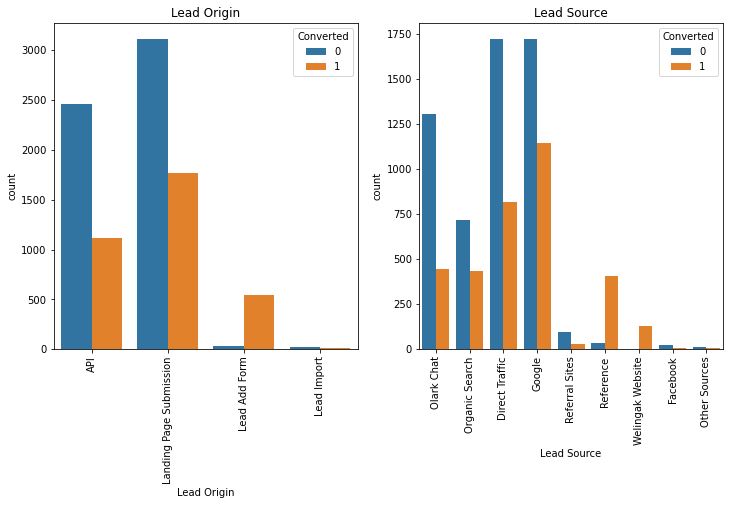

In [42]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= ld_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= ld_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()


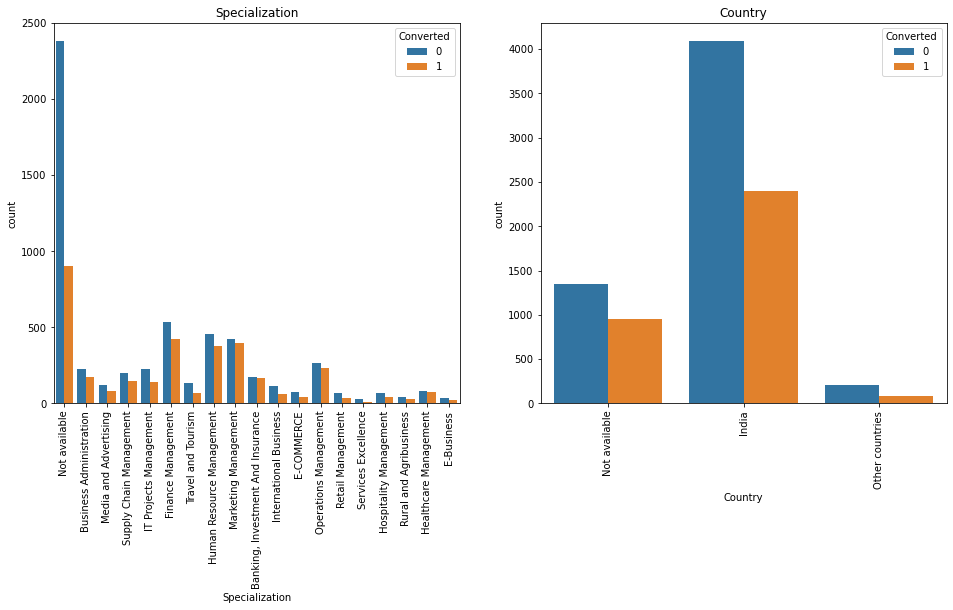

In [43]:
plt.figure(figsize = (16,7))


plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= ld_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= ld_df).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

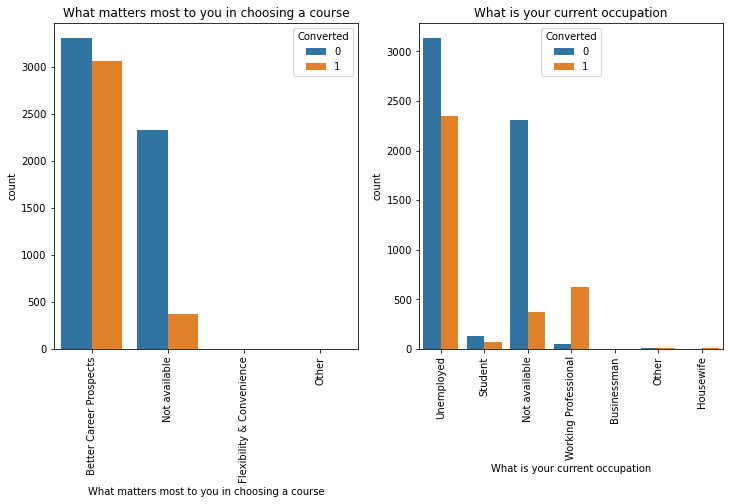

In [44]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course',
              hue='Converted', data= ld_df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= ld_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()


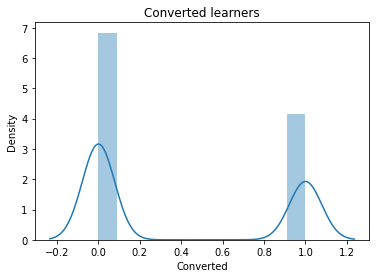

In [45]:
sns.distplot(ld_df['Converted'])
plt.title('Converted learners')
plt.show()

### Numerical var

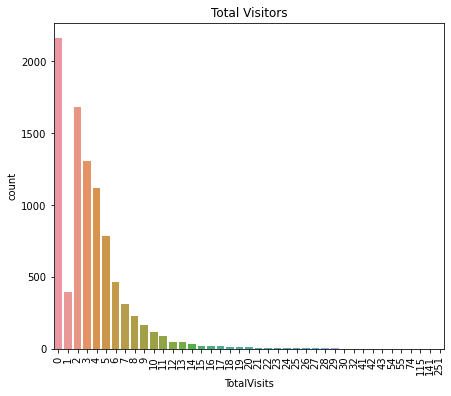

In [46]:
plt.figure(figsize=(7,6))
sns.countplot(ld_df['TotalVisits']).tick_params(axis='x', rotation = 90)
plt.title('Total Visitors')
plt.show()

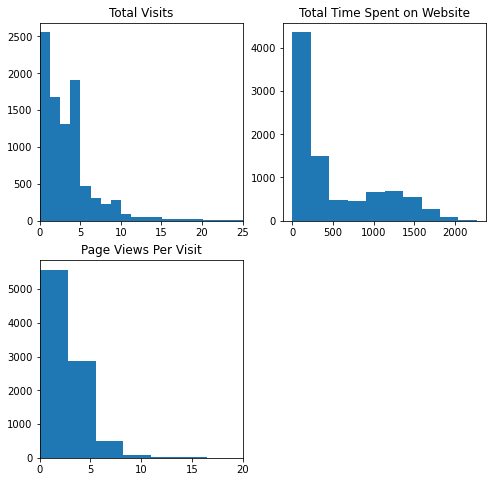

In [47]:

plt.figure(figsize = (8,8))
plt.subplot(221)
plt.hist(ld_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(ld_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(ld_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()


### Bivariate Analysis

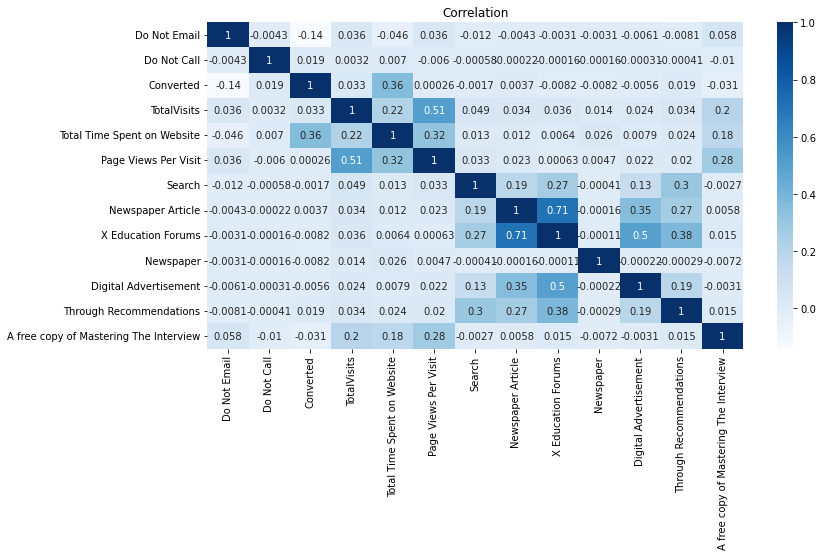

In [48]:
# correlation within varibles checking
plt.figure(figsize=(12,6))
sns.heatmap(ld_df.corr(),cmap='Blues',annot=True)
plt.title('Correlation')
plt.show()

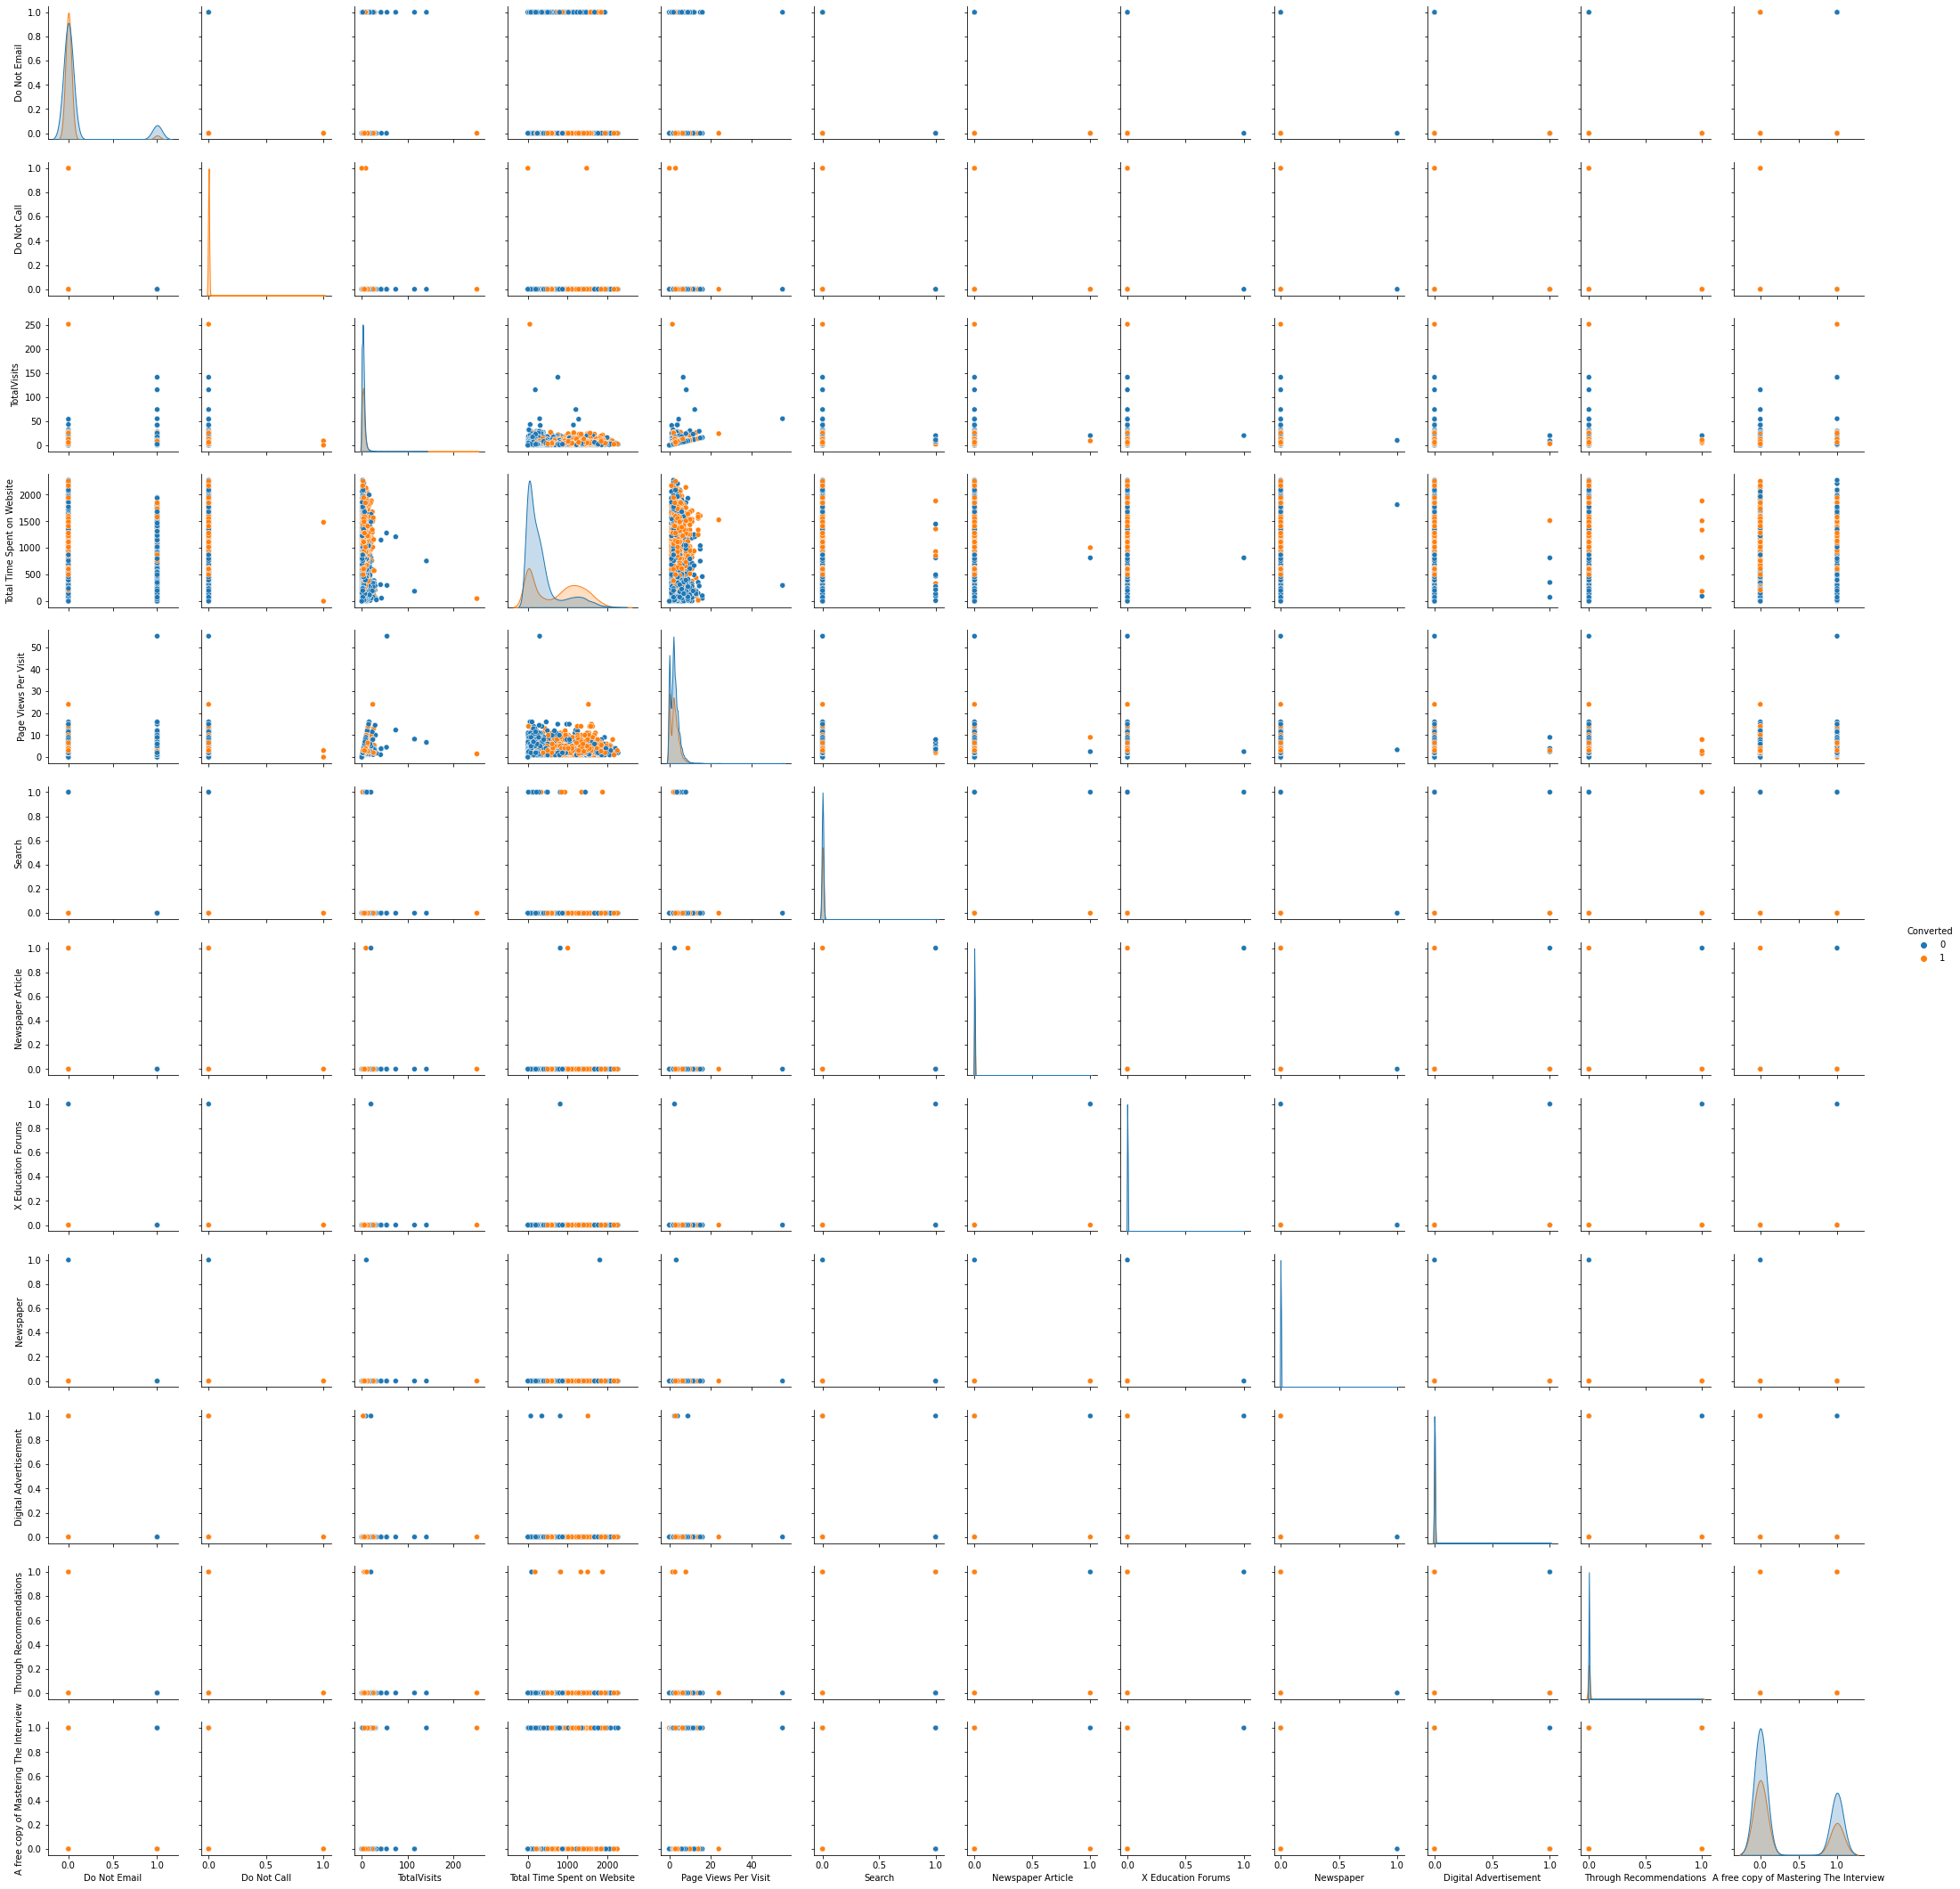

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(ld_df,diag_kind='kde',hue='Converted')
plt.show()

In [50]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   int64  
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Country                                        9074 non-null   object 
 9   Specialization                                 9074 

In [51]:
#['Do Not Call','Do Not Email','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'] 
#in which mostly one value is present. Hence its better to drop these.

ld_df=ld_df.drop(['Do Not Call','Do Not Email','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [52]:
ld_df.shape

(9074, 11)

#### Outliers Check

In [53]:
num_col = ld_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_col.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


<AxesSubplot:xlabel='Total Time Spent on Website'>

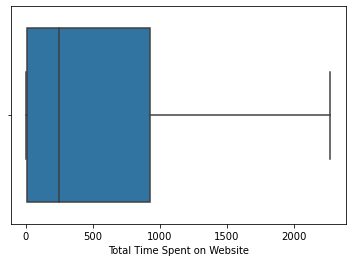

In [54]:
# Check Outliers 
sns.boxplot(x=ld_df['Total Time Spent on Website'])


<AxesSubplot:xlabel='TotalVisits'>

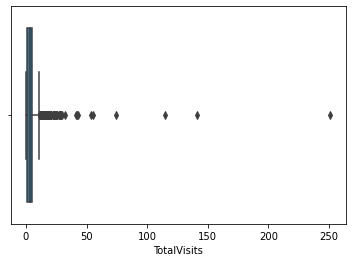

In [55]:
sns.boxplot(x=ld_df['TotalVisits'])


## Dummy Variables Creation

In [56]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Converted                                      9074 non-null   int64  
 3   TotalVisits                                    9074 non-null   int64  
 4   Total Time Spent on Website                    9074 non-null   int64  
 5   Page Views Per Visit                           9074 non-null   float64
 6   Country                                        9074 non-null   object 
 7   Specialization                                 9074 non-null   object 
 8   What is your current occupation                9074 non-null   object 
 9   What matters most to you in choosing a course  9074 

In [57]:
ld_df.shape

(9074, 11)

In [58]:
# dummy variables creation using get_dummies

dummy=pd.get_dummies(ld_df[['Lead Origin','Lead Source','Country','Specialization' ,
                           'What is your current occupation','A free copy of Mastering The Interview','What matters most to you in choosing a course']], drop_first=True)


# Adding results to master dataframe
ld_dm = pd.concat([ld_df, dummy], axis=1)

In [59]:
ld_dm.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Not available,Country_Other countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not available,What matters most to you in choosing a course_Other
0,API,Olark Chat,0,0,0,0.0,Not available,Not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,5,674,2.5,India,Not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2,1532,2.0,India,Business Administration,Student,Better Career Prospects,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2,1428,1.0,India,Not available,Unemployed,Better Career Prospects,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [60]:
ld_dm.shape

(9074, 52)

In [61]:
ld_dm.drop(['Lead Origin','Lead Source','Country','Specialization' ,
                           'What is your current occupation','A free copy of Mastering The Interview','What matters most to you in choosing a course'],axis=1,inplace=True)

In [62]:
ld_dm.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Not available,Country_Other countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not available,What matters most to you in choosing a course_Other
0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,2,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [63]:
ld_dm.shape

(9074, 44)

## Train-Test Split Processing

In [64]:
# Importing library

from sklearn.model_selection import train_test_split

In [65]:
# Put feature var. to X
X=ld_dm.drop('Converted',axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Not available,Country_Other countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not available,What matters most to you in choosing a course_Other
0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [66]:
# Put response var. to y
y = ld_dm['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Splitting dataset into 70%,30% for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

## Feature Scaling Process

In [68]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale 3 numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Not available,Country_Other countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not available,What matters most to you in choosing a course_Other
1289,0.014184,0.612676,0.083333,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
# Conversion Rate

print("Conversion rate is ", (sum(ld_dm['Converted'])/len(ld_dm['Converted'].index))*100)

Conversion rate is  37.85541106458012


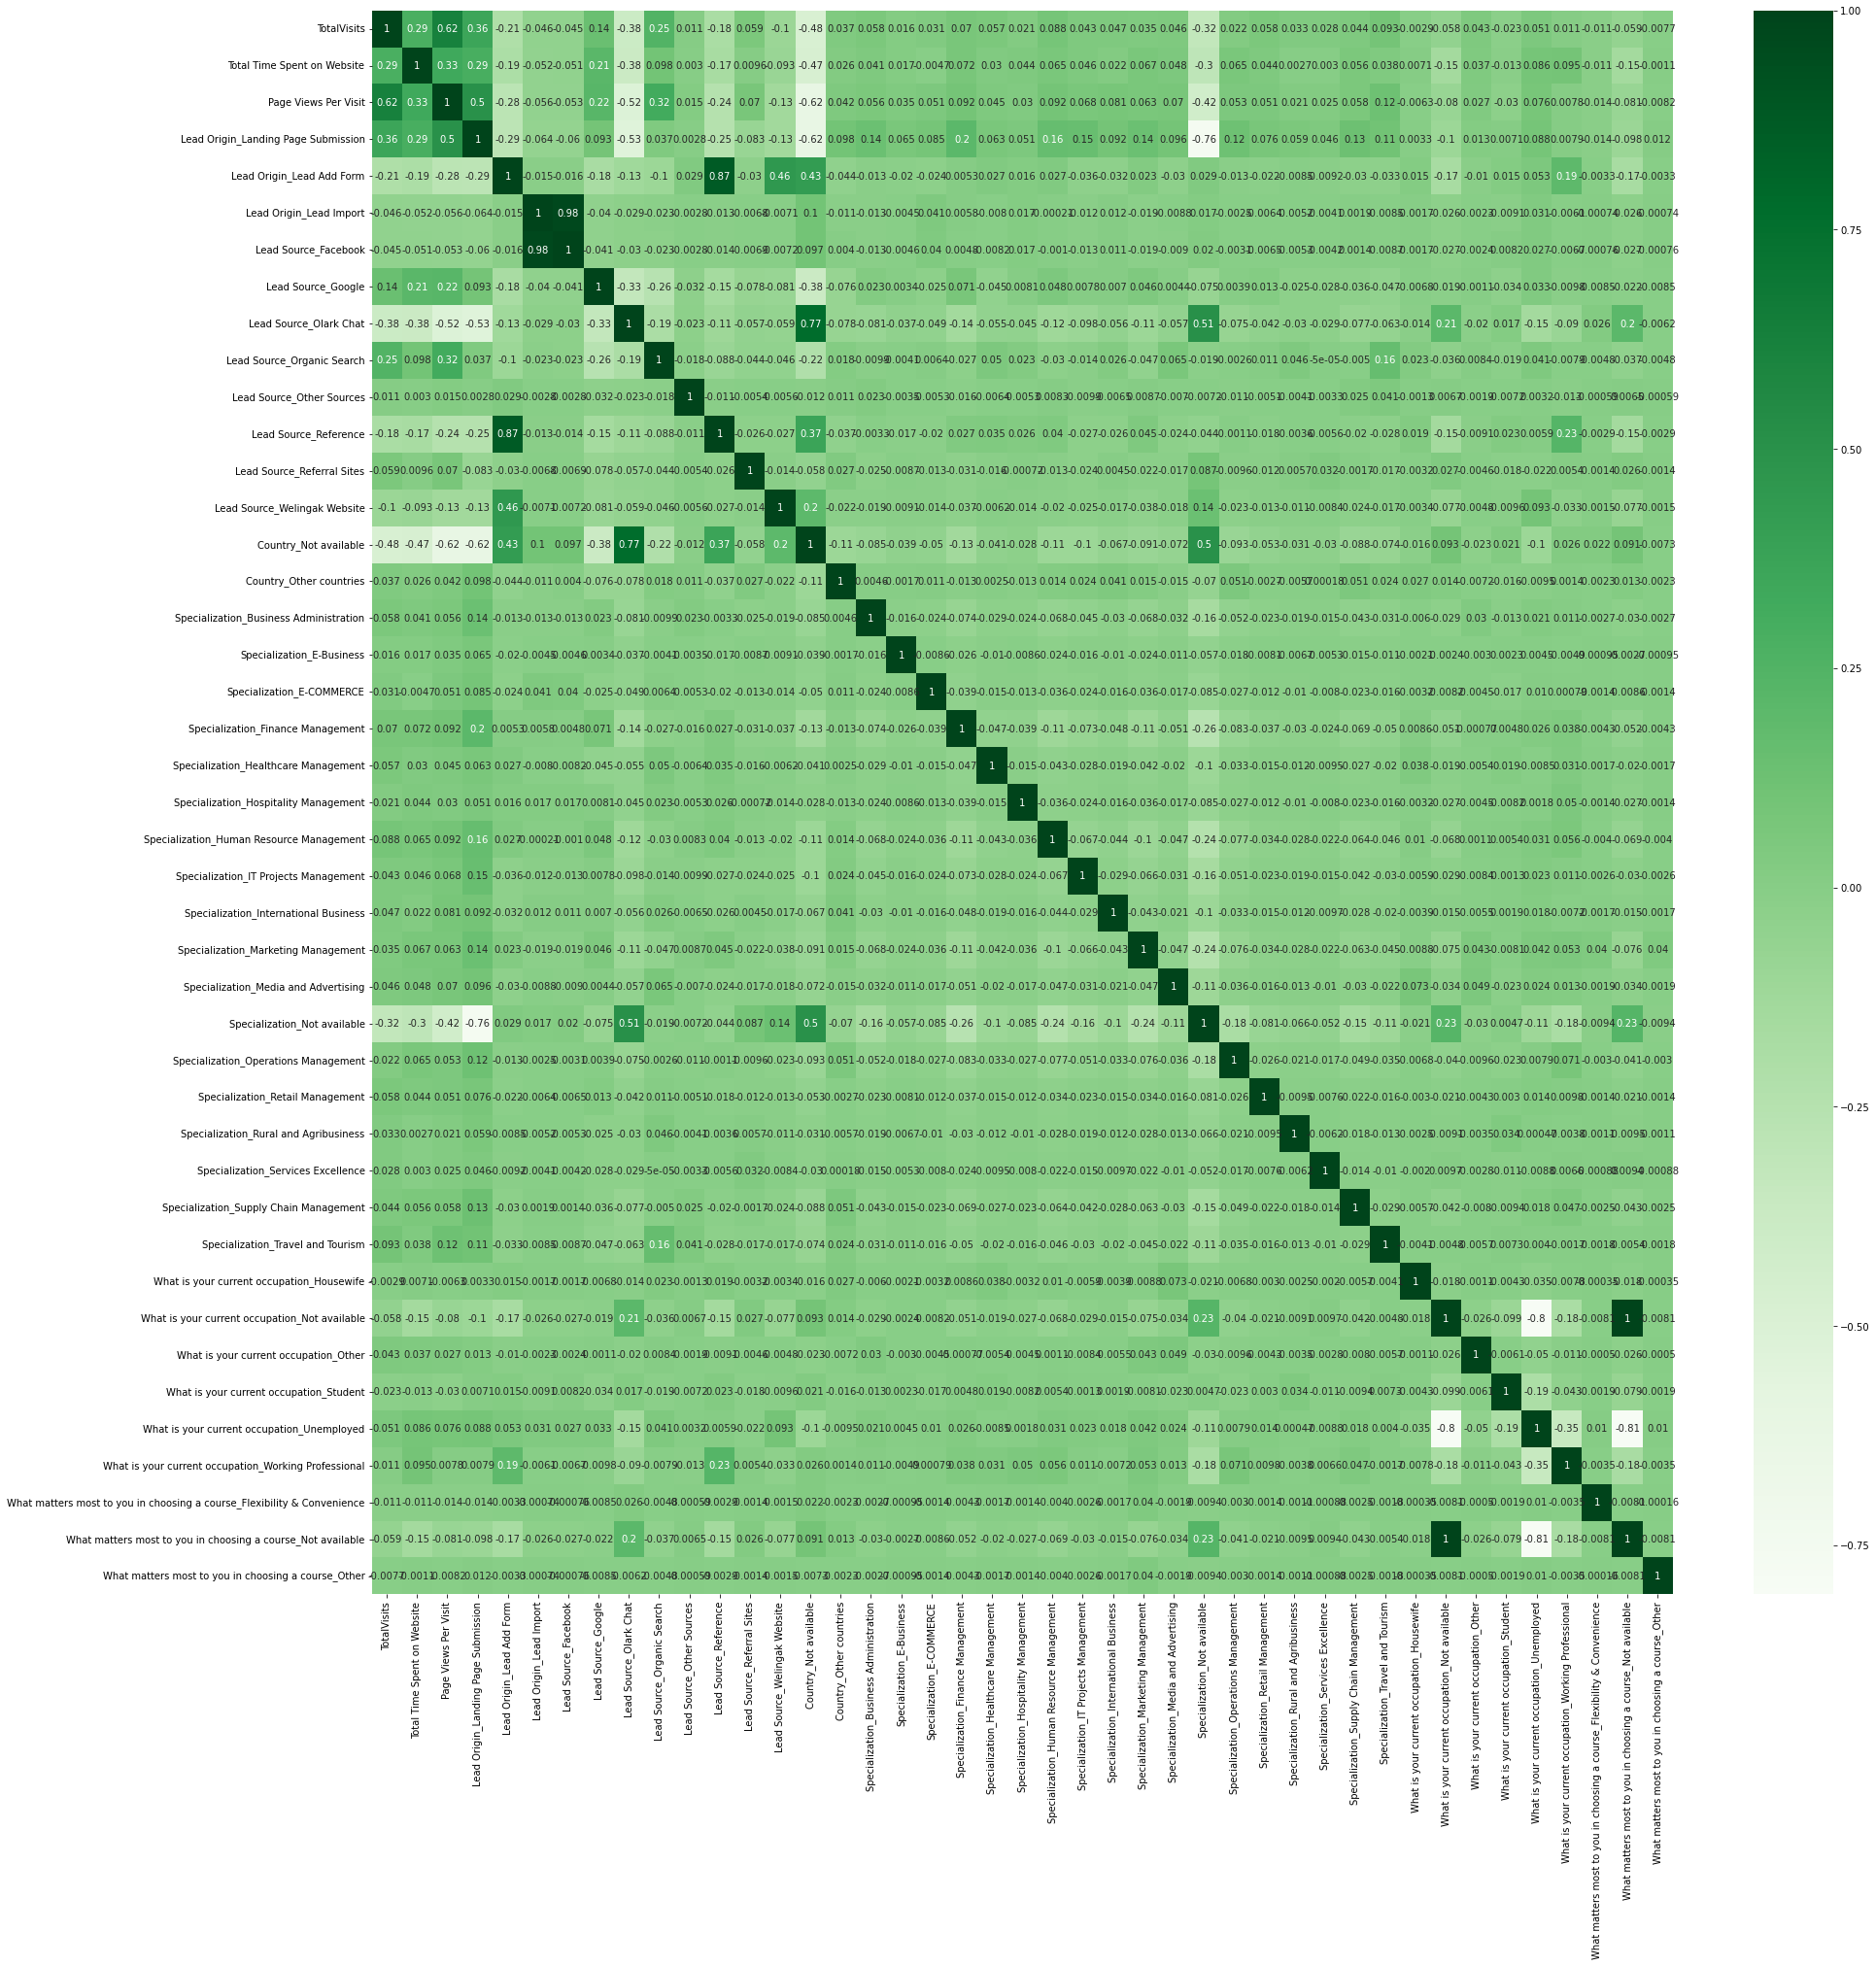

In [70]:
# correlation check within varibles

plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(),annot = True,cmap='Greens')
plt.show()

# Building Models

### Model 1

In [71]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
# Import RFE
from sklearn.feature_selection import RFE

In [73]:
# Running RFE- 15 variables output
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [74]:
# Features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Facebook', False, 11),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Other Sources', False, 28),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_Not available', True, 1),
 ('Country_Other countries', False, 2),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 16),
 ('Specialization_E-COMMERCE', False, 26),
 ('Specialization_Finance Management', False, 17),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 18),


In [75]:
# Putting RFE selected columns in the variable 'col'
col = X_train.columns[rfe.support_]

In [76]:
X_train=X_train[col]

In [77]:
#import 'statsmodel'
import statsmodels.api as sm

In [78]:
# Logistic Regression 
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2868.9
Date:                Tue, 15 Nov 2022   Deviance:                       5737.9
Time:                        12:31:50   Pearson chi2:                 6.70e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3502
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -0.7853      0.687     -1.143      0.253      -2.132       0.561
TotalVisits                                                     4.5561      1.477      3.085      0.002       1.661       7.451
Total Time Spent on Website                                     4.7539      0.163     29.227      0.000       4.435       5.073
Lead Origin_Landing Page Submission                            -0.9845      0.119     -8.277      0.000      -1.218      -0.751
Lead Origin_Lead Add Form                                       2.2596      0.225     10.036      0.000       1.818       2.701
Lead Source_Welingak Website                                    2.9997      1.029      2.916      0.004       0.984       5.016
Country_Not available                                           1.2202      0.120     10.199      0.000       0.986       1.455
Specialization_Hospitality Management                          -0.8049      0.306     -2.630      0.009      -1.405      -0.205
Specialization_Not available                                   -1.0739      0.120     -8.918      0.000      -1.310      -0.838
Specialization_Retail Management                               -0.5518      0.311     -1.773      0.076      -1.162       0.058
What is your current occupation_Housewife                      23.6296   3.01e+04      0.001      0.999    -5.9e+04     5.9e+04
What is your current occupation_Not available                  20.7303   2.15e+04      0.001      0.999   -4.22e+04    4.22e+04
What is your current occupation_Student                        -0.3532      0.706     -0.500      0.617      -1.737       1.031
What is your current occupation_Unemployed                     -0.2327      0.677     -0.344      0.731      -1.559       1.093
What is your current occupation_Working Professional            2.3118      0.703      3.291      0.001       0.935       3.689
What matters most to you in choosing a course_Not available   -22.1502   2.15e+04     -0.001      0.999   -4.22e+04    4.22e+04
===============================================================================================================================
"""

In [79]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# VIF dataframe for all the variables
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
14,What matters most to you in choosing a course_...,183.37
10,What is your current occupation_Not available,181.58
12,What is your current occupation_Unemployed,9.67
2,Lead Origin_Landing Page Submission,7.08
7,Specialization_Not available,4.89
5,Country_Not available,3.11
1,Total Time Spent on Website,2.36
0,TotalVisits,2.32
13,What is your current occupation_Working Profes...,1.99
3,Lead Origin_Lead Add Form,1.97


In [81]:
#features with high VIF dropped
X_train.drop('What matters most to you in choosing a course_Not available',axis=1,inplace=True)

### Model 2

In [82]:
# Refitting model with new features set
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2871.5
Date:                Tue, 15 Nov 2022   Deviance:                       5742.9
Time:                        12:31:51   Pearson chi2:                 6.70e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3497
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7729      0.687     -1.125      0.261      -2.120       0.574
TotalVisits                                              4.6172      1.480      3.120      0.002       1.717       7.518
Total Time Spent on Website                              4.7572      0.163     29.258      0.000       4.439       5.076
Lead Origin_Landing Page Submission                     -1.0086      0.118     -8.524      0.000      -1.241      -0.777
Lead Origin_Lead Add Form                                2.2522      0.225     10.001      0.000       1.811       2.694
Lead Source_Welingak Website                             3.0092      1.029      2.925      0.003       0.993       5.025
Country_Not available                                    1.2280      0.120     10.260      0.000       0.993       1.463
Specialization_Hospitality Management                   -0.8048      0.306     -2.630      0.009      -1.404      -0.205
Specialization_Not available                            -1.1038      0.119     -9.244      0.000      -1.338      -0.870
Specialization_Retail Management                        -0.5506      0.311     -1.769      0.077      -1.161       0.059
What is your current occupation_Housewife               22.6365   1.82e+04      0.001      0.999   -3.57e+04    3.58e+04
What is your current occupation_Not available           -1.4107      0.680     -2.074      0.038      -2.744      -0.078
What is your current occupation_Student                 -0.3949      0.706     -0.560      0.576      -1.778       0.989
What is your current occupation_Unemployed              -0.2254      0.677     -0.333      0.739      -1.552       1.101
What is your current occupation_Working Professional     2.2864      0.702      3.257      0.001       0.910       3.662
========================================================================================================================
"""

In [83]:
# Make a VIF df for all variables
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.58
2,Lead Origin_Landing Page Submission,6.97
10,What is your current occupation_Not available,5.47
7,Specialization_Not available,4.78
5,Country_Not available,3.11
1,Total Time Spent on Website,2.36
0,TotalVisits,2.32
13,What is your current occupation_Working Profes...,1.99
3,Lead Origin_Lead Add Form,1.97
4,Lead Source_Welingak Website,1.37


In [84]:
#features with high VIF Dropped
X_train.drop('What is your current occupation_Unemployed',axis=1,inplace=True)

### Model 3

In [85]:
# Refitting model with new features set
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2871.5
Date:                Tue, 15 Nov 2022   Deviance:                       5743.0
Time:                        12:31:51   Pearson chi2:                 6.70e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3496
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9976      0.130     -7.675      0.000      -1.252      -0.743
TotalVisits                                              4.6462      1.479      3.142      0.002       1.748       7.544
Total Time Spent on Website                              4.7585      0.163     29.273      0.000       4.440       5.077
Lead Origin_Landing Page Submission                     -1.0098      0.118     -8.539      0.000      -1.242      -0.778
Lead Origin_Lead Add Form                                2.2517      0.225      9.999      0.000       1.810       2.693
Lead Source_Welingak Website                             3.0096      1.029      2.926      0.003       0.993       5.026
Country_Not available                                    1.2287      0.120     10.266      0.000       0.994       1.463
Specialization_Hospitality Management                   -0.8057      0.306     -2.633      0.008      -1.405      -0.206
Specialization_Not available                            -1.1052      0.119     -9.260      0.000      -1.339      -0.871
Specialization_Retail Management                        -0.5517      0.311     -1.773      0.076      -1.162       0.058
What is your current occupation_Housewife               22.8612   1.82e+04      0.001      0.999   -3.57e+04    3.58e+04
What is your current occupation_Not available           -1.1859      0.083    -14.347      0.000      -1.348      -1.024
What is your current occupation_Student                 -0.1702      0.206     -0.826      0.409      -0.574       0.234
What is your current occupation_Working Professional     2.5111      0.193     12.984      0.000       2.132       2.890
========================================================================================================================
"""

In [86]:
# Make a VIF df for all var.
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Country_Not available,2.58
2,Lead Origin_Landing Page Submission,2.55
7,Specialization_Not available,2.53
0,TotalVisits,2.12
1,Total Time Spent on Website,2.06
3,Lead Origin_Lead Add Form,1.81
10,What is your current occupation_Not available,1.58
4,Lead Source_Welingak Website,1.34
12,What is your current occupation_Working Profes...,1.20
11,What is your current occupation_Student,1.04


In [87]:
#features with high P-value dropped
X_train.drop('What is your current occupation_Housewife',axis=1,inplace=True)

### Model 4

In [88]:
# Refitting model with new features set
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.5
Date:                Tue, 15 Nov 2022   Deviance:                       5750.9
Time:                        12:31:51   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3488
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9898      0.130     -7.628      0.000      -1.244      -0.736
TotalVisits                                              4.5786      1.474      3.107      0.002       1.690       7.467
Total Time Spent on Website                              4.7528      0.162     29.265      0.000       4.434       5.071
Lead Origin_Landing Page Submission                     -1.0089      0.118     -8.540      0.000      -1.240      -0.777
Lead Origin_Lead Add Form                                2.2596      0.225     10.043      0.000       1.819       2.701
Lead Source_Welingak Website                             3.0021      1.029      2.918      0.004       0.986       5.018
Country_Not available                                    1.2233      0.120     10.235      0.000       0.989       1.458
Specialization_Hospitality Management                   -0.8092      0.306     -2.645      0.008      -1.409      -0.210
Specialization_Not available                            -1.1079      0.119     -9.287      0.000      -1.342      -0.874
Specialization_Retail Management                        -0.5546      0.311     -1.782      0.075      -1.164       0.055
What is your current occupation_Not available           -1.1881      0.083    -14.378      0.000      -1.350      -1.026
What is your current occupation_Student                 -0.1733      0.206     -0.841      0.400      -0.577       0.231
What is your current occupation_Working Professional     2.5066      0.193     12.962      0.000       2.128       2.886
========================================================================================================================
"""

In [89]:
# VIF df for all the var.
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Country_Not available,2.58
2,Lead Origin_Landing Page Submission,2.55
7,Specialization_Not available,2.53
0,TotalVisits,2.12
1,Total Time Spent on Website,2.06
3,Lead Origin_Lead Add Form,1.81
9,What is your current occupation_Not available,1.58
4,Lead Source_Welingak Website,1.34
11,What is your current occupation_Working Profes...,1.20
10,What is your current occupation_Student,1.04


In [90]:
# features with high P-value dropped
X_train.drop('What is your current occupation_Student',axis=1,inplace=True)

### Model 5

In [91]:
# Refitting model with the new features set
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.8
Date:                Tue, 15 Nov 2022   Deviance:                       5751.7
Time:                        12:31:51   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3488
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9941      0.130     -7.667      0.000      -1.248      -0.740
TotalVisits                                              4.5939      1.475      3.115      0.002       1.703       7.485
Total Time Spent on Website                              4.7524      0.162     29.268      0.000       4.434       5.071
Lead Origin_Landing Page Submission                     -1.0111      0.118     -8.566      0.000      -1.242      -0.780
Lead Origin_Lead Add Form                                2.2611      0.225     10.049      0.000       1.820       2.702
Lead Source_Welingak Website                             3.0069      1.029      2.923      0.003       0.991       5.023
Country_Not available                                    1.2195      0.119     10.211      0.000       0.985       1.454
Specialization_Hospitality Management                   -0.8069      0.306     -2.636      0.008      -1.407      -0.207
Specialization_Not available                            -1.1086      0.119     -9.301      0.000      -1.342      -0.875
Specialization_Retail Management                        -0.5564      0.311     -1.790      0.074      -1.166       0.053
What is your current occupation_Not available           -1.1816      0.082    -14.360      0.000      -1.343      -1.020
What is your current occupation_Working Professional     2.5125      0.193     13.001      0.000       2.134       2.891
========================================================================================================================
"""

In [92]:
# VIF df for all the var.
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Country_Not available,2.57
2,Lead Origin_Landing Page Submission,2.52
7,Specialization_Not available,2.51
0,TotalVisits,2.12
1,Total Time Spent on Website,2.06
3,Lead Origin_Lead Add Form,1.81
9,What is your current occupation_Not available,1.56
4,Lead Source_Welingak Website,1.34
10,What is your current occupation_Working Profes...,1.19
6,Specialization_Hospitality Management,1.02


In [93]:
#features with high P-value dropped
X_train.drop('Specialization_Retail Management',axis=1,inplace=True)

### Model 6

In [94]:
# Refitting model with new features set
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.5
Date:                Tue, 15 Nov 2022   Deviance:                       5754.9
Time:                        12:31:52   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3484
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9973      0.130     -7.700      0.000      -1.251      -0.743
TotalVisits                                              4.5143      1.462      3.089      0.002       1.650       7.379
Total Time Spent on Website                              4.7437      0.162     29.255      0.000       4.426       5.061
Lead Origin_Landing Page Submission                     -1.0130      0.118     -8.581      0.000      -1.244      -0.782
Lead Origin_Lead Add Form                                2.2637      0.225     10.062      0.000       1.823       2.705
Lead Source_Welingak Website                             3.0044      1.029      2.921      0.003       0.988       5.020
Country_Not available                                    1.2154      0.119     10.191      0.000       0.982       1.449
Specialization_Hospitality Management                   -0.7959      0.306     -2.601      0.009      -1.396      -0.196
Specialization_Not available                            -1.1010      0.119     -9.244      0.000      -1.334      -0.868
What is your current occupation_Not available           -1.1809      0.082    -14.354      0.000      -1.342      -1.020
What is your current occupation_Working Professional     2.5090      0.193     12.989      0.000       2.130       2.888
========================================================================================================================
"""

In [95]:
# VIF df for all the var.
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Country_Not available,2.57
2,Lead Origin_Landing Page Submission,2.52
7,Specialization_Not available,2.51
0,TotalVisits,2.12
1,Total Time Spent on Website,2.05
3,Lead Origin_Lead Add Form,1.81
8,What is your current occupation_Not available,1.56
4,Lead Source_Welingak Website,1.34
9,What is your current occupation_Working Profes...,1.19
6,Specialization_Hospitality Management,1.02


## Model 6 looks good with P-value (<0.05) and VIF (<5) 

## Creating Predictions

In [96]:
# Predicting the probabilities-train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


1289    0.723125
3604    0.112656
5584    0.638050
7679    0.112656
7563    0.730091
7978    0.783728
7780    0.195511
7863    0.987691
838     0.805739
708     0.387800
dtype: float64

In [97]:
# Reshaping array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72312538, 0.11265573, 0.63805042, 0.11265573, 0.73009059,
       0.78372773, 0.19551131, 0.9876913 , 0.80573947, 0.38780045])

In [98]:
# Df with given convertion rate and probablity of predicted one
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.723125
1,0,0.112656
2,0,0.638050
3,0,0.112656
4,0,0.730091


In [99]:
# Substituting 0 or 1 with cut off=0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.723125,1
1,0,0.112656,0
2,0,0.638050,1
3,0,0.112656,0
4,0,0.730091,1


## Model Evaluation

In [100]:
# Importing metrics from sklearn
from sklearn import metrics

In [101]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3444,  451],
       [ 809, 1647]], dtype=int64)

In [102]:
# Checking accuracy overall
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8016060462919226

In [103]:
# Substituting val of true positive
TP = confusion[1,1]
# Substituting val of true negatives
TN = confusion[0,0]
# Substituting val of false positives
FP = confusion[0,1] 
# Substituting val of false negatives
FN = confusion[1,0]

In [104]:
# sensitivity 
TP / float(TP+FN)

0.6706026058631922

In [105]:
# specificity
TN / float(TN+FP)

0.8842105263157894

In [106]:
# false postive rate
print(FP/ float(TN+FP))

0.11578947368421053


In [107]:
# positive predictive val
print (TP / float(TP+FP))

0.7850333651096282


In [108]:
# Negative predictive val
print (TN / float(TN+ FN))

0.8097813308252998


## ROC Curve

In [109]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

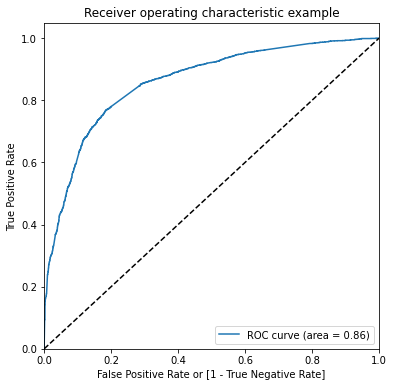

In [111]:
# Call ROC func.
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


##  Optimal Cut off -ROC Curve

In [112]:
# Creating cols having diff probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.723125,1,1,1,1,1,1,1,1,1,0,0
1,0,0.112656,0,1,1,0,0,0,0,0,0,0,0
2,0,0.638050,1,1,1,1,1,1,1,1,0,0,0
3,0,0.112656,0,1,1,0,0,0,0,0,0,0,0
4,0,0.730091,1,1,1,1,1,1,1,1,1,0,0
5,1,0.783728,1,1,1,1,1,1,1,1,1,0,0
6,1,0.195511,0,1,1,0,0,0,0,0,0,0,0
7,1,0.987691,1,1,1,1,1,1,1,1,1,1,1
8,1,0.805739,1,1,1,1,1,1,1,1,1,1,0
9,0,0.387800,0,1,1,1,1,0,0,0,0,0,0


In [113]:
# Creating df to see accuracy, sensitivity, and specificity vals at diff. vals of probabiity cutoffs
cut_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_df.loc[i] =[ i ,accuracy,sensi,speci]
cut_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.499449,0.983713,0.194095
0.2,0.2,0.703196,0.899430,0.579461
0.3,0.3,0.792946,0.775651,0.803851
0.4,0.4,0.799717,0.718648,0.850834
0.5,0.5,0.801606,0.670603,0.884211
0.6,0.6,0.780507,0.566368,0.915533
0.7,0.7,0.760038,0.473534,0.940693
0.8,0.8,0.724768,0.332248,0.972272
0.9,0.9,0.699732,0.239821,0.989730


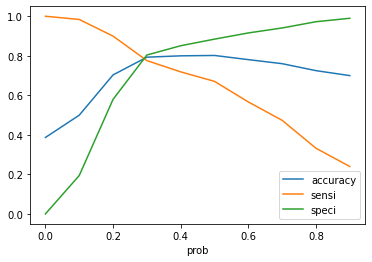

In [114]:
# Plotting the same
cut_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.30 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.723125,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.112656,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.638050,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.112656,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.730091,1,1,1,1,1,1,1,1,1,0,0,1


In [116]:
# Check accuracy overall
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7929459927570461

In [117]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3131,  764],
       [ 551, 1905]], dtype=int64)

In [118]:

# Substituting val of true positive
TP = confusion2[1,1]
# Substituting val of true negatives
TN = confusion2[0,0]
# Substituting val of false positives
FP = confusion2[0,1] 
# Substituting val of false negatives
FN = confusion2[1,0]

In [119]:
# Sensitivity of created logistic regression model
TP / float(TP+FN)

0.7756514657980456

In [120]:
# Specificity
TN / float(TN+FP)

0.8038510911424904

In [121]:
# False postive rate - predicting churn when customer doesnt churned
print(FP/ float(TN+FP))

0.19614890885750963


In [122]:
# Positive predictive val 
print (TP / float(TP+FP))

0.7137504683402023


In [123]:
# Negative predictive val
print (TN / float(TN+ FN))

0.8503530689842477


## Prediction on Test set (cut off=0.3)

In [124]:
# Scaling numeric vals
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [125]:
# Substituting all cols. in final train model
col = X_train.columns

In [126]:
# Select cols. in X_train for X_test
X_test = X_test[col]
# Adding constant to X_test|
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Country_Not available,Specialization_Hospitality Management,Specialization_Not available,What is your current occupation_Not available,What is your current occupation_Working Professional
8308,1.0,0.035461,0.416813,1,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,1,0,0,0,0,0,0,1
2085,1.0,0.000000,0.000000,0,1,1,1,0,1,0,0
4048,1.0,0.028369,0.617077,1,0,0,0,0,0,0,0
4790,1.0,0.028369,0.005282,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,0,0,1,0,0,0,0
8179,1.0,0.170213,0.148768,1,0,0,0,0,0,1,0
6236,1.0,0.000000,0.000000,0,0,0,1,0,1,1,0
5240,1.0,0.078014,0.458627,1,0,0,0,0,0,0,0


In [127]:
# Storing prediction of test set 'y_test_pd'
y_test_pd = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pd)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.531696
1,1,0.653162
2,1,0.987691
3,1,0.739800
4,0,0.135025


In [128]:
# prediction using cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head(10)

,Converted,Conversion_Prob,final_predicted
0,0,0.531696,1
1,1,0.653162,1
2,1,0.987691,1
3,1,0.739800,1
4,0,0.135025,0
5,1,0.430266,1
6,0,0.608954,1
7,1,0.554305,1
8,1,0.759387,1
9,0,0.112656,0


In [129]:
# Checking accuracy overall
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7774513404333456

In [130]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1362,  382],
       [ 224,  755]], dtype=int64)

In [131]:
# Substituting val of true positive
TP = confusion2[1,1]
# Substituting val of true negatives
TN = confusion2[0,0]
# Substituting val of false positives
FP = confusion2[0,1] 
# Substituting val of false negatives
FN = confusion2[1,0]

In [132]:
# sensitivity
TP/(TP+FN)


0.7711950970377937

In [133]:
# specificity
TN/(TN+FP)

0.7809633027522935

## Precision-Recall

In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3444,  451],
       [ 809, 1647]], dtype=int64)

In [135]:
# Precision 
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7850333651096282

In [136]:
#Recall 
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6706026058631922

### Precision and Recall - tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve


In [138]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


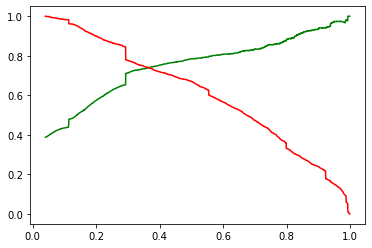

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_train_pred_final.head(10)


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.723125,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.112656,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.638050,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.112656,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.730091,1,1,1,1,1,1,1,1,1,0,0,1
5,1,0.783728,1,1,1,1,1,1,1,1,1,0,0,1
6,1,0.195511,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.987691,1,1,1,1,1,1,1,1,1,1,1,1
8,1,0.805739,1,1,1,1,1,1,1,1,1,1,0,1
9,0,0.387800,0,1,1,1,1,0,0,0,0,0,0,0


In [142]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7987718469532357

In [143]:
# Recreating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3296,  599],
       [ 679, 1777]], dtype=int64)

In [144]:
# Substituting val of true positive
TP = confusion2[1,1]
# Substituting val of true negatives
TN = confusion2[0,0]
# Substituting val of false positives
FP = confusion2[0,1] 
# Substituting val of false negatives
FN = confusion2[1,0]

In [145]:
# Precision
TP / (TP + FP)

0.747895622895623

In [146]:
#Recall 
TP / (TP + FN)

0.7235342019543974

## Prediction Test set (Precision and recall tradeoff=0.39)

In [147]:
# Storing prediction of test set in y_test_pd
y_test_pd = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pd)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.531696
1,1,0.653162
2,1,0.987691
3,1,0.739800
4,0,0.135025


In [148]:
# predicting using cut off 0.39
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_pred_final.head(20)

,Converted,Conversion_Prob,final_predicted
0,0,0.531696,1
1,1,0.653162,1
2,1,0.987691,1
3,1,0.739800,1
4,0,0.135025,0
5,1,0.430266,1
6,0,0.608954,1
7,1,0.554305,1
8,1,0.759387,1
9,0,0.112656,0


In [149]:
#accuracy overall
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7969151670951157

In [150]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1455,  289],
       [ 264,  715]], dtype=int64)

In [151]:

# Substituting val of true positive
TP = confusion2[1,1]
# Substituting val of true negatives
TN = confusion2[0,0]
# Substituting val of false positives
FP = confusion2[0,1] 
# Substituting val of false negatives
FN = confusion2[1,0]

In [152]:
# Precision
TP / (TP + FP)

0.7121513944223108

In [153]:
#Recall 
TP / (TP + FN)

0.7303370786516854

## Final lead scoring

In [154]:
conversion_score=y_pred_final
conversion_score.rename(columns = {'Conversion_score':'Lead_score'}, inplace = True)
conversion_score.head(20)

,Converted,Conversion_Prob,final_predicted
0,0,0.531696,1
1,1,0.653162,1
2,1,0.987691,1
3,1,0.739800,1
4,0,0.135025,0
5,1,0.430266,1
6,0,0.608954,1
7,1,0.554305,1
8,1,0.759387,1
9,0,0.112656,0


## Summary

### Imp features

- Lead Origin_Lead Add Form
- TotalVisits
- Lead Source_Welingak Website, Google Website, Direct traffic 
- What is your current occupation_Not available
- Total Time Spent on Website
- Specialization_Not available
- Country_Not available
- What is your current occupation_Working Professional
- Lead Origin_Landing Page Submission
- Specialization_Hospitality Management
